# Levenshtein Distance

In this notebook we'll explore Levenshtein distance, and how we can use it to compare strings.

We will be using a Wagner-Fischer matrix to calculate our Levenshtein distance, let's write a function that will perform this operation for us given two strings.

In [ ]:
#######

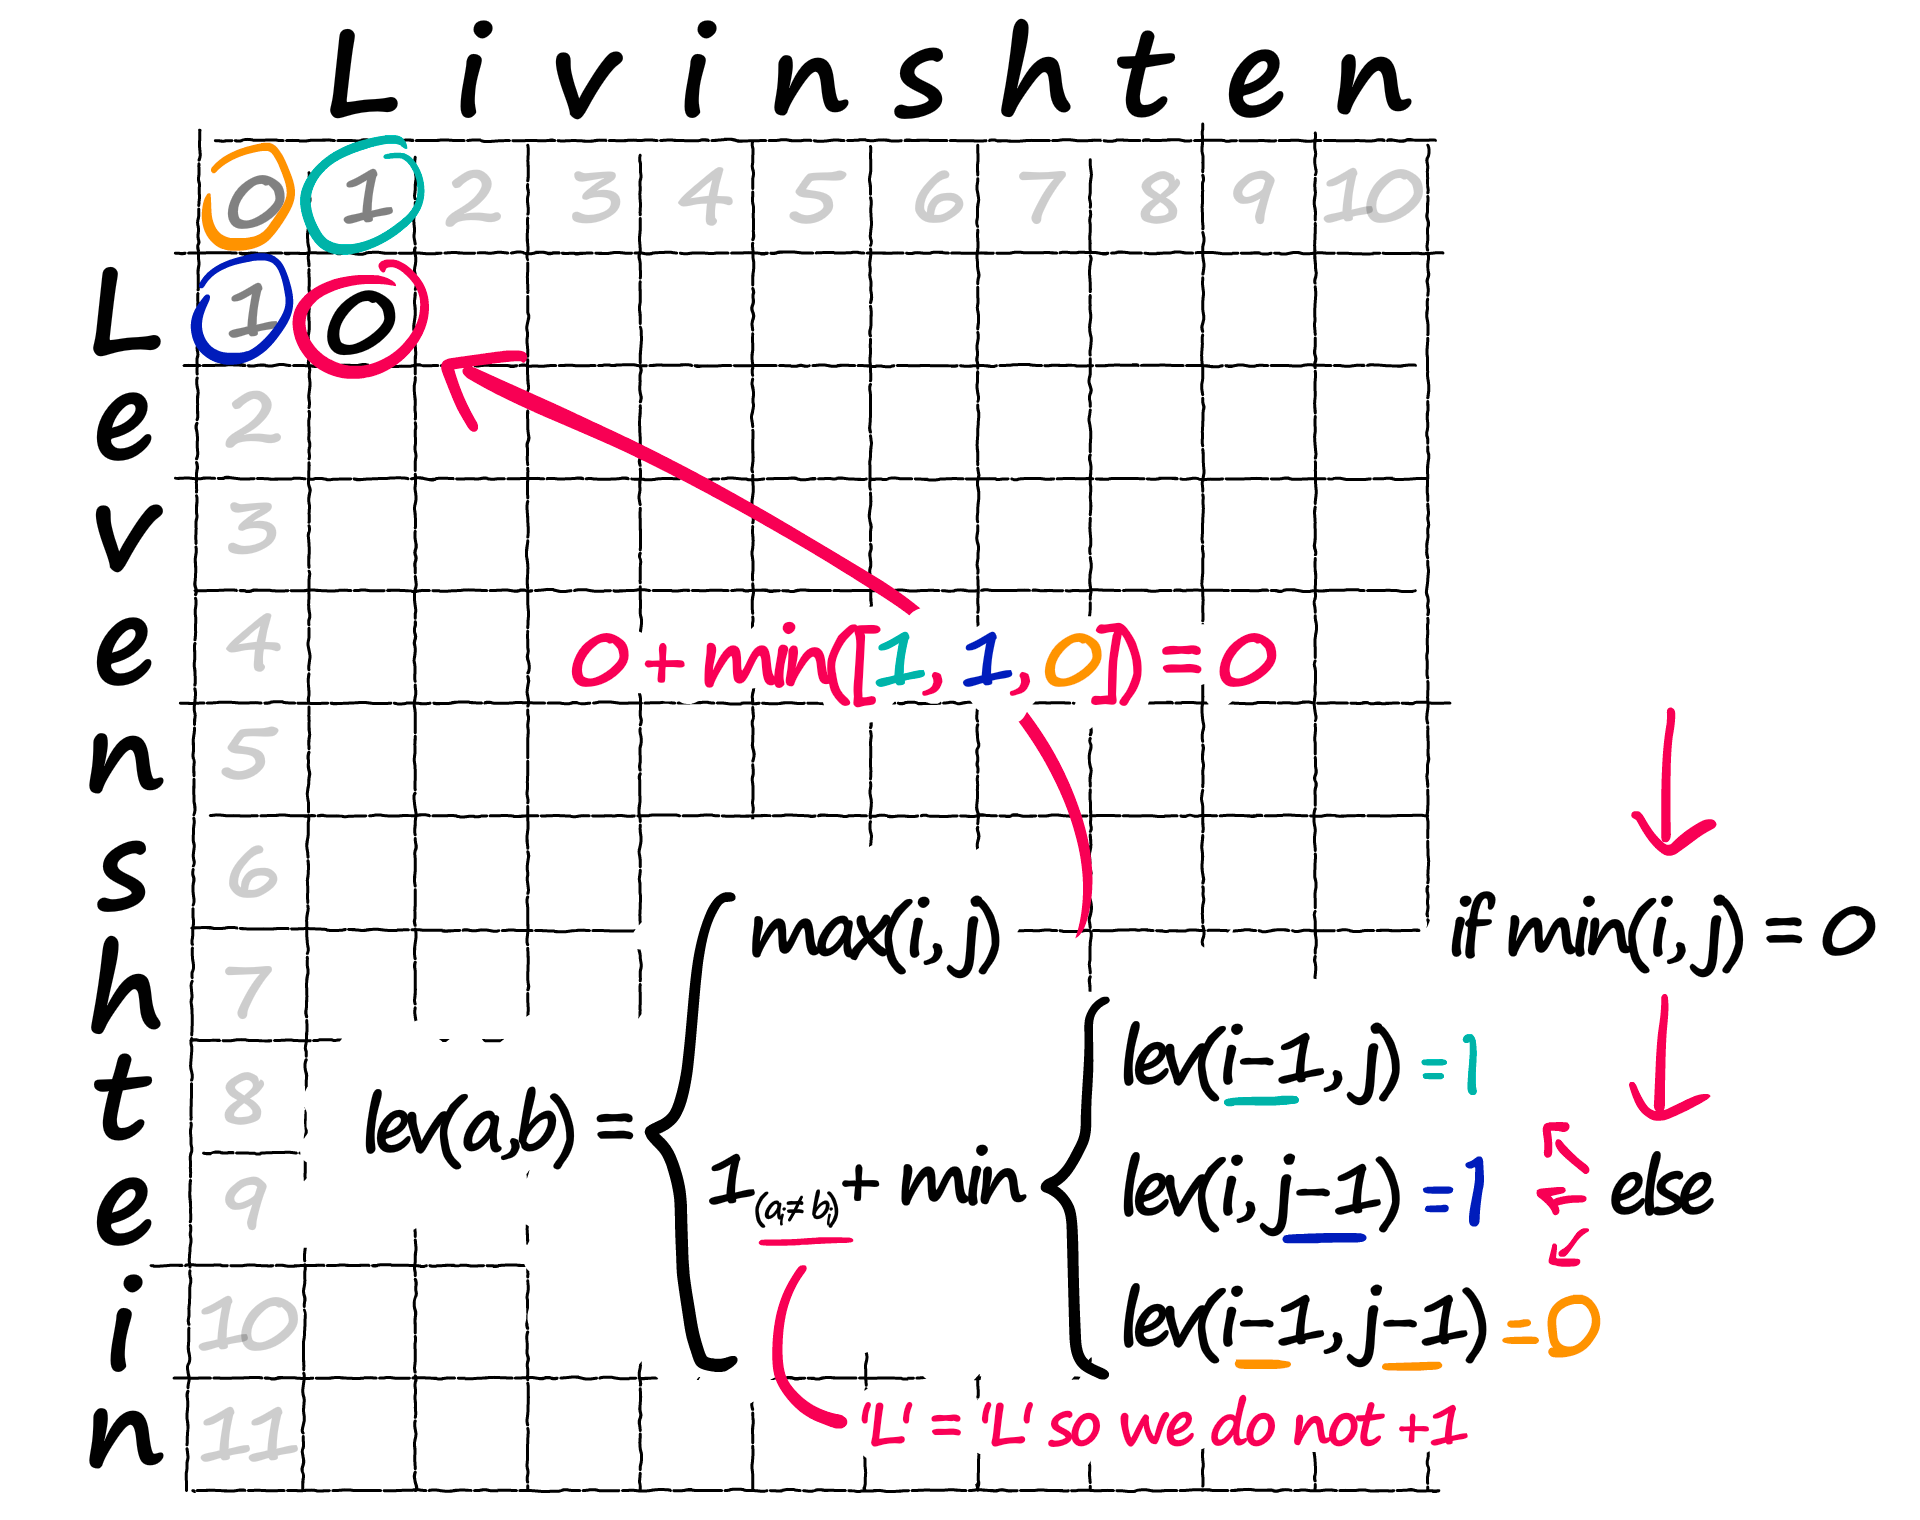

In [ ]:
import numpy as np

def leven(a, b):
    # we must add an additional character at the start of each string
    a = f' {a}'
    b = f' {b}'
    # initialize empty zero array
    lev = np.zeros((len(a), len(b)))
    # now begin iterating through each value, finding the best path
    for i in range(len(a)):
        for j in range(len(b)):
            if min([i, j]) == 0:
                lev[i, j] = max([i, j])
            else:
                # calculate our three possible operations
                x = lev[i-1, j]  # deletion
                y = lev[i, j-1]  # insertion
                z = lev[i-1, j-1]  # substitution
                # take the minimum (eg best path/operation)
                lev[i, j] = min([x, y, z])
                # and if our two current characters don't match, add 1
                if a[i] != b[j]:
                    # if we have a match, don't add 1
                    lev[i, j] += 1
    return lev, lev[-1, -1]

Let's test this on some strings.

In [ ]:
leven('hello world', 'hello wurld')

(array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
        [ 1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
        [ 2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 3.,  2.,  1.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  5.,  6.],
        [ 4.,  3.,  2.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  5.,  6.],
        [ 5.,  4.,  3.,  1.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
        [ 6.,  5.,  4.,  2.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.],
        [ 7.,  6.,  5.,  3.,  3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.],
        [ 8.,  7.,  6.,  4.,  4.,  2.,  2.,  1.,  1.,  2.,  3.,  4.],
        [ 9.,  8.,  7.,  5.,  5.,  3.,  3.,  2.,  2.,  1.,  2.,  3.],
        [10.,  9.,  8.,  5.,  5.,  4.,  4.,  3.,  3.,  2.,  1.,  2.],
        [11., 10.,  9.,  6.,  6.,  5.,  5.,  4.,  4.,  3.,  2.,  1.]]),
 1.0)

Here, we only need to make one change between our two strings, switching between `u` and `o` in `world`. The bottom-right value gives us our Levenshtein distance (the number of changes that must be made), which is equal to **1**.

Let's try it with another.

In [ ]:
leven('Levenshtein', 'Levinsten')

(array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
        [ 1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.],
        [ 2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  5.,  6.],
        [ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.],
        [ 4.,  3.,  1.,  1.,  1.,  2.,  3.,  4.,  4.,  5.],
        [ 5.,  4.,  2.,  2.,  2.,  1.,  2.,  3.,  4.,  4.],
        [ 6.,  5.,  3.,  3.,  3.,  2.,  1.,  2.,  3.,  4.],
        [ 7.,  6.,  4.,  4.,  4.,  3.,  2.,  2.,  3.,  4.],
        [ 8.,  7.,  5.,  5.,  5.,  4.,  3.,  2.,  3.,  4.],
        [ 9.,  8.,  5.,  6.,  6.,  5.,  4.,  3.,  2.,  3.],
        [10.,  9.,  6.,  6.,  6.,  6.,  5.,  4.,  3.,  3.],
        [11., 10.,  7.,  7.,  7.,  6.,  6.,  5.,  4.,  3.]]),
 3.0)

Here, we find that we need **3** operations two switch between `'Levenshtein'` and `'Levinshten'`.

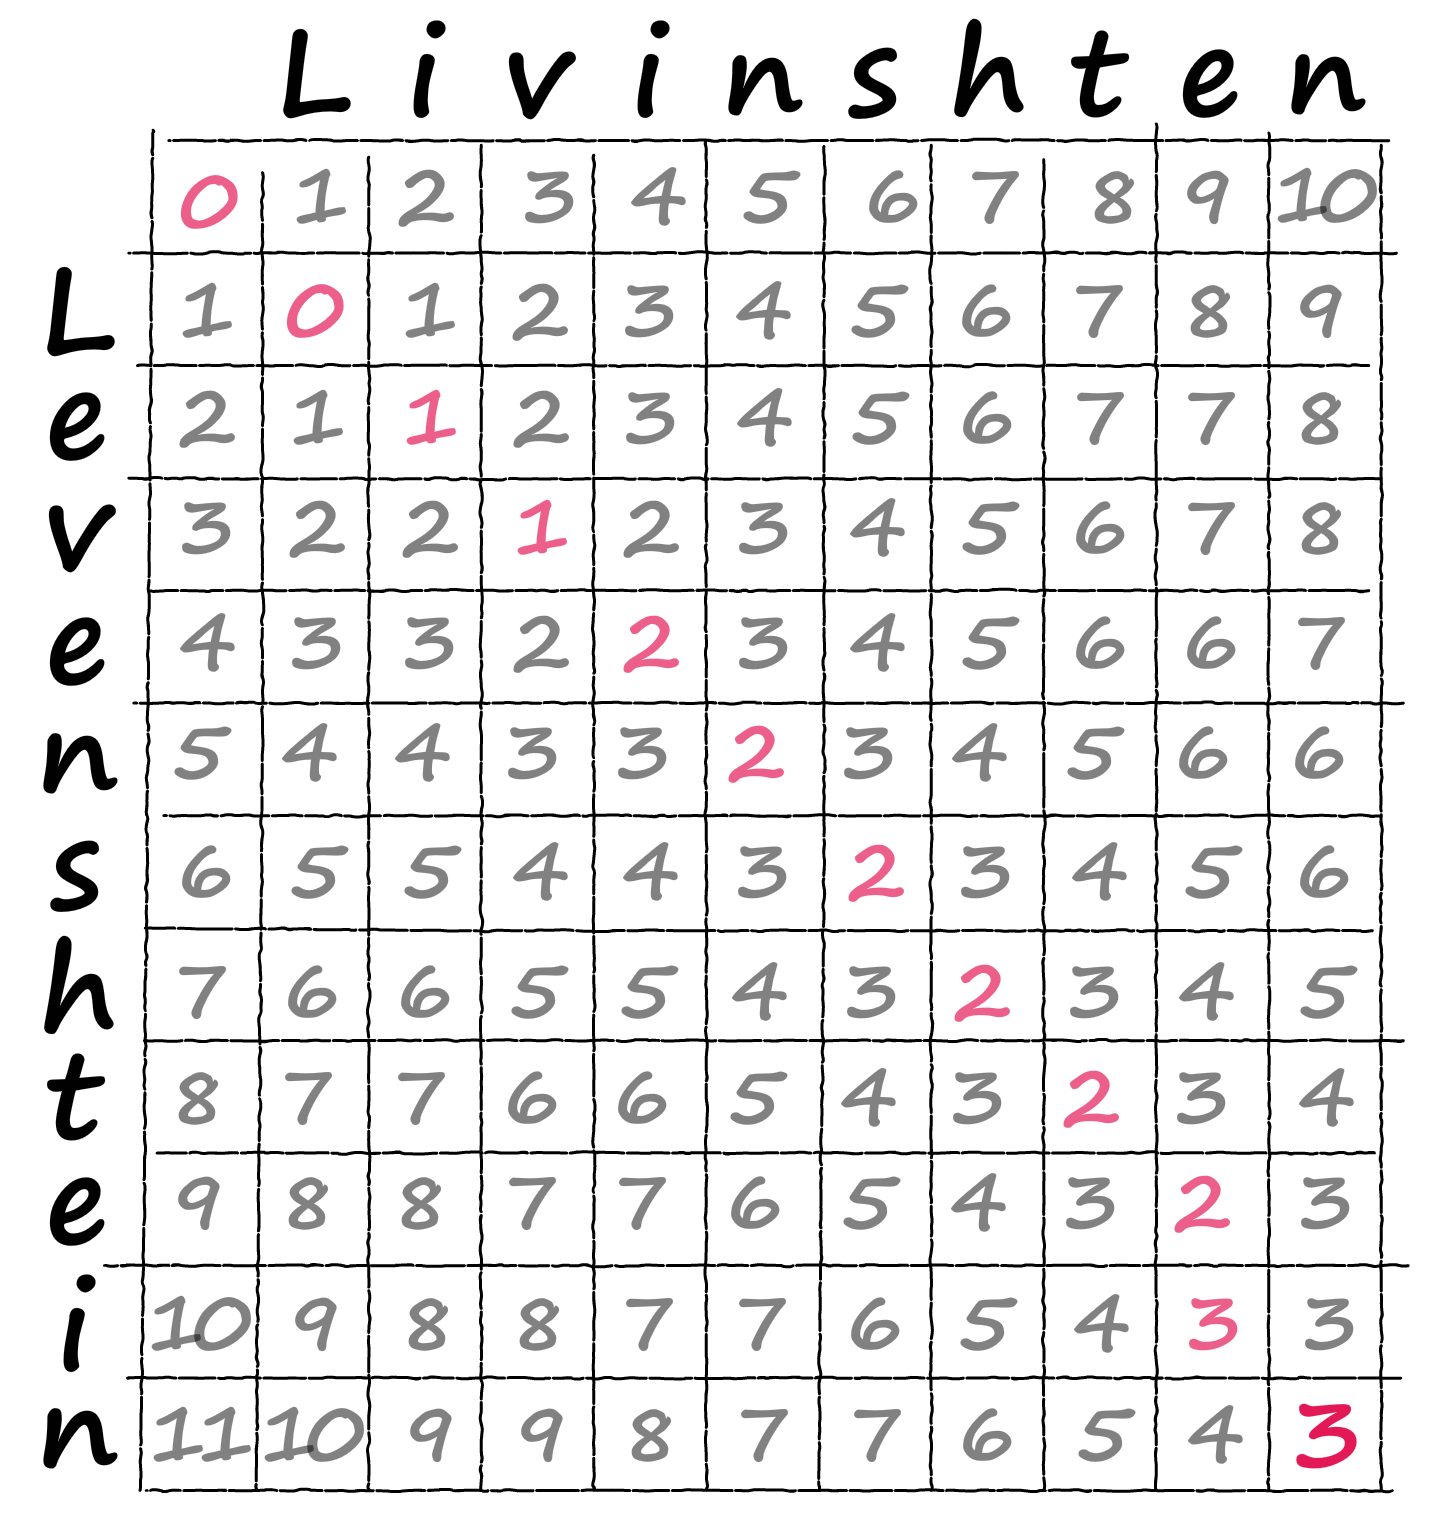